# Comparing weight norm

In [4]:
import sys
sys.path.append('../..')
from deep_bottleneck.eval_tools.experiment_loader import ExperimentLoader
from deep_bottleneck.eval_tools.utils import format_config, find_differing_config_keys
import matplotlib.pyplot as plt
from io import BytesIO

import pandas as pd
import numpy as np

In [5]:
loader = ExperimentLoader()

In [6]:
experiment_ids = [943,944,945,946,947,948,949]
experiments = loader.find_by_ids(experiment_ids)
differing_config_keys = find_differing_config_keys(experiments)  

In [8]:
experiments[0].config

{'activation_fn': 'tanh',
 'architecture': [10, 7, 5, 4, 3],
 'batch_size': 256,
 'callbacks': [],
 'dataset': 'datasets.harmonics',
 'discretization_range': 0.07,
 'epochs': 8000,
 'estimator': 'mi_estimator.binning',
 'initial_bias': 0,
 'learning_rate': 0.0004,
 'max_norm_weights': 0.9,
 'model': 'models.feedforward',
 'n_runs': 5,
 'optimizer': 'adam',
 'plotters': [['plotter.informationplane', []],
  ['plotter.snr', []],
  ['plotter.informationplane_movie', []],
  ['plotter.activations', []],
  ['plotter.activations_single_neuron', []]],
 'seed': 0}

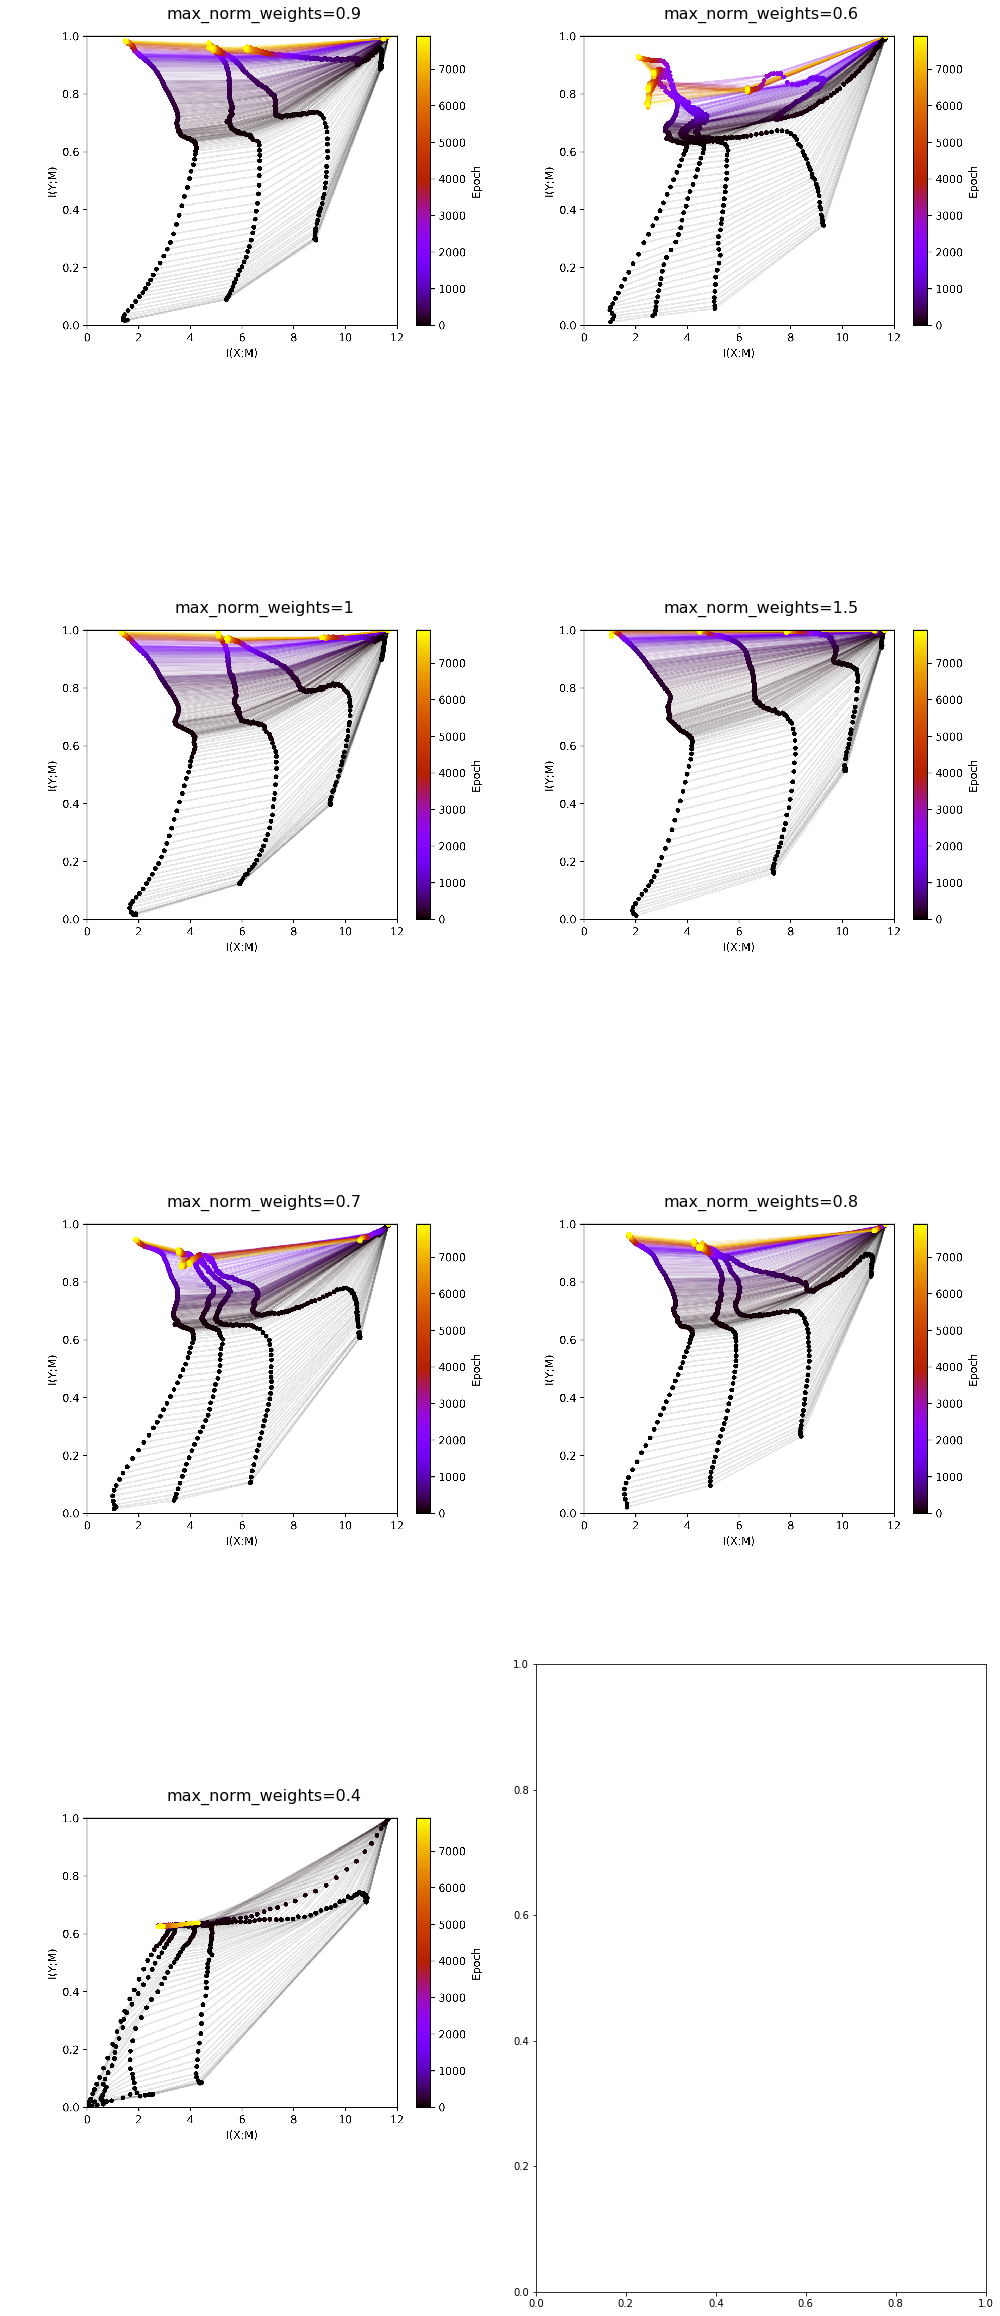

In [7]:
fig, ax = plt.subplots(4,2, figsize=(14, 34))
ax = ax.flat

for i, experiment in enumerate(experiments):
    img = plt.imread(BytesIO(experiment.artifacts['infoplane_train'].content))
    ax[i].axis('off')
    ax[i].imshow(img)
    ax[i].set_title(format_config(experiment.config, *differing_config_keys),
                    fontsize=16)
plt.tight_layout()    
plt.show()